<h1 align="center">Capstone Project on Eurocontrol ATFM Delays</h1>

### <font color='Blue'><strong>Table of Content

1. [Introduction](#1) <a id=18></a>
    - 1.1 [Business Case](#2)
    - 1.2 [About Eurocontrol](#3)
    
2. [Data Preparation](#4)
    - 2.1 [Libraries](#5)
    - 2.2 [Data Inspection](#6)
    - 2.3 [Data Cleaning](#7)
    
3. [Exploratory Data Analysis](#8)
    - 3.1 [Univariate Analysis](#9)
    - 3.2 [Bivariate Analysis](#10)
    - 3.3 [EDA Conclusion](#11)
    
4. [Data Preprocessing](#12)
    - 4.1 [Data Preparation](#13)
    - 4.2 [Train-Test Split](#14)
    
5. [Modeling](#15)
    - 5.1 [Linear Regression](#16)
    - 5.2 [Random Forest Model](#17)
    - 5.3 [Decision Tree Model](#18)
    - 5.4 [Model Performance Overview](#19)

6. [Overall Conclusion and Insights](#20)
    

<h3 style="color:blue; font-size:26px;">1. Introduction<a id="1"></a></h3>


### <font color='blue'>1.1 Business Case<a id=2></a></font>

The Flight Operations Department at X Airlines has observed a persistent trend of delays on flights operating within European airspace. Concerned about the operational and financial impact of these delays, the department has decided to conduct an analysis to identify the underlying causes and patterns. 

The insights from this analysis will help the department develop and implement measures to mitigate such delays.

To obtain relevant and reliable data, the airline engaged EUROCONTROL, which subsequently provided the necessary dataset for analysis.


### <font color='blue'>1.2 About Eurocontrol<a id=3></a></font>

EUROCONTROL (European Organisation for the Safety of Air Navigation) is an intergovernmental organization that supports European aviation by coordinating and managing air traffic across the continent. Founded in 1960, it has now 42 Member and 2 Comprehensive Agreement States.

EUROCONTROL’s main mission is to ensure safe, efficient, and environmentally-friendly air traffic management (ATM) across Europe. It works closely with national air navigation service providers, civil and military authorities, and international bodies like ICAO and EASA.

Headquartered in Brussels

![Eurocontrol members states](eurocontrol_members.jpg)

![Eurocontrol map](eurocontrol_map.jpg)

<h3 style="color:blue; font-size:26px;">2. Data Preparation<a id="4"></a></h3>

### <font color='blue'>2.1 Libraries<a id=5></a></font>

In [1]:
# Importing the various libraries pandas, numpy, seaborn and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### <font color='blue'>2.2 Data Inspection<a id=6></a></font>

In [2]:
# Loading the dataset
# File path
file_path = "En-Route_ATFM_Delay_FIR_projectdataset.xlsx"

# Load the DATA sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name="DATA")

# Basic EDA starts here
df.head()

,YEAR,MONTH_NUM,MONTH_MON,ENTITY_NAME,ENTITY_TYPE,FLT_ERT_1,DLY_ERT_1,DLY_ERT_A_1,DLY_ERT_C_1,DLY_ERT_D_1,...,DLY_ERT_N_1,DLY_ERT_O_1,DLY_ERT_P_1,DLY_ERT_R_1,DLY_ERT_S_1,DLY_ERT_T_1,DLY_ERT_V_1,DLY_ERT_W_1,DLY_ERT_NA_1,ATFM_VERSION
0,2016,1,JAN,Albania,COUNTRY (FIR),10366,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v3
1,2016,1,JAN,Armenia,COUNTRY (FIR),2896,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v3
2,2016,1,JAN,Austria,COUNTRY (FIR),74611,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v3
3,2016,1,JAN,Baltic FAB,FAB (FIR),57978,2856.0,0.0,2716.0,0.0,...,0.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v3
4,2016,1,JAN,Belgium,COUNTRY (FIR),83329,2848.0,0.0,1911.0,0.0,...,0.0,937.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,v3


In [3]:
# Info about columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6084 entries, 0 to 6083
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YEAR          6084 non-null   int64  
 1   MONTH_NUM     6084 non-null   int64  
 2   MONTH_MON     6084 non-null   object 
 3   ENTITY_NAME   6084 non-null   object 
 4   ENTITY_TYPE   6084 non-null   object 
 5   FLT_ERT_1     6084 non-null   int64  
 6   DLY_ERT_1     4126 non-null   float64
 7   DLY_ERT_A_1   4126 non-null   float64
 8   DLY_ERT_C_1   4126 non-null   float64
 9   DLY_ERT_D_1   4126 non-null   float64
 10  DLY_ERT_E_1   4126 non-null   float64
 11  DLY_ERT_G_1   4126 non-null   float64
 12  DLY_ERT_I_1   4126 non-null   float64
 13  DLY_ERT_M_1   4126 non-null   float64
 14  DLY_ERT_N_1   4126 non-null   float64
 15  DLY_ERT_O_1   4126 non-null   float64
 16  DLY_ERT_P_1   4126 non-null   float64
 17  DLY_ERT_R_1   4126 non-null   float64
 18  DLY_ERT_S_1   4126 non-null 

In [4]:
# Check shape (rows, columns)
print(df.shape)

(6084, 24)


In [5]:
# Check for missing values
print(df.isnull().sum())

YEAR               0
MONTH_NUM          0
MONTH_MON          0
ENTITY_NAME        0
ENTITY_TYPE        0
FLT_ERT_1          0
DLY_ERT_1       1958
DLY_ERT_A_1     1958
DLY_ERT_C_1     1958
DLY_ERT_D_1     1958
DLY_ERT_E_1     1958
DLY_ERT_G_1     1958
DLY_ERT_I_1     1958
DLY_ERT_M_1     1958
DLY_ERT_N_1     1958
DLY_ERT_O_1     1958
DLY_ERT_P_1     1958
DLY_ERT_R_1     1958
DLY_ERT_S_1     1958
DLY_ERT_T_1     1958
DLY_ERT_V_1     1958
DLY_ERT_W_1     1958
DLY_ERT_NA_1    1958
ATFM_VERSION       0
dtype: int64


In [6]:
# descriptive statistics (for numeric columns)
# pre-cleaning

print(df.describe())

              YEAR    MONTH_NUM     FLT_ERT_1     DLY_ERT_1  DLY_ERT_A_1  \
count  6084.000000  6084.000000  6.084000e+03  4.126000e+03  4126.000000   
mean   2020.009862     6.500000  1.009774e+05  1.041680e+05     4.706738   
std       2.581036     3.452336  1.360609e+05  3.574376e+05    59.319893   
min    2016.000000     1.000000  2.920000e+02  0.000000e+00     0.000000   
25%    2018.000000     3.750000  2.455725e+04  1.530000e+02     0.000000   
50%    2020.000000     6.500000  5.707750e+04  5.252500e+03     0.000000   
75%    2022.000000     9.250000  1.201322e+05  4.452500e+04     0.000000   
max    2024.000000    12.000000  1.018454e+06  5.661331e+06  1289.000000   

        DLY_ERT_C_1  DLY_ERT_D_1  DLY_ERT_E_1   DLY_ERT_G_1   DLY_ERT_I_1  \
count  4.126000e+03       4126.0  4126.000000   4126.000000  4.126000e+03   
mean   3.888885e+04          0.0     2.475763     59.822346  7.172013e+03   
std    1.312468e+05          0.0    34.934595    383.792251  6.021422e+04   
min    

### Column Glossary

| Column Name       | Label                           | Column Description                                                                 |
|-------------------|----------------------------------|-------------------------------------------------------------------------------------|
| YEAR              | YEAR                            | Reference year                                                                     |
| MONTH_NUM         | MONTH                           | Month (numeric)                                                                    |
| MONTH_MON         | MONTH_MON                       | Month (3-letter code)                                                              |
| ENTITY_NAME       | ENTITY_NAME                     | Entity name                                                                        |
| ENTITY_TYPE       | ENTITY_TYPE                     | Type of the entity to which the data relates (ANSP, FAB, AREA)                    |
| FLT_ERT_1         | Flights                         | Total number of flights within the respective airspace                            |
| DLY_ERT_1         | En-route ATFM delay             | Minutes of en-route ATFM delay                                                     |
| DLY_ERT_A_1       | A - Accident/Incident           | Minutes of en-route ATFM delay with delay code A - Accident/Incident              |
| DLY_ERT_C_1       | C - ATC Capacity                | Minutes of en-route ATFM delay with delay code C - ATC Capacity                   |
| DLY_ERT_D_1       | D - De-icing                    | Minutes of en-route ATFM delay with delay code D - De-icing                       |
| DLY_ERT_E_1       | E - Equipment (non-ATC)         | Minutes of en-route ATFM delay with delay code E - Equipment (non-ATC)           |
| DLY_ERT_G_1       | G - Aerodrome Capacity          | Minutes of en-route ATFM delay with delay code G - Aerodrome Capacity            |
| DLY_ERT_I_1       | I - Industrial Action (ATC)     | Minutes of en-route ATFM delay with delay code I - Industrial Action (ATC)       |
| DLY_ERT_M_1       | M - Airspace Management         | Minutes of en-route ATFM delay with delay code M - Airspace Management           |
| DLY_ERT_N_1       | N - Industrial Action (non-ATC) | Minutes of en-route ATFM delay with delay code N - Industrial Action (non-ATC)   |
| DLY_ERT_O_1       | O - Other                       | Minutes of en-route ATFM delay with delay code O - Other                         |
| DLY_ERT_P_1       | P - Special Event               | Minutes of en-route ATFM delay with delay code P - Special Event                 |
| DLY_ERT_R_1       | R - ATC Routeing                | Minutes of en-route ATFM delay with delay code R - ATC Routeing                  |
| DLY_ERT_S_1       | S - ATC Staffing                | Minutes of en-route ATFM delay with delay code S - ATC Staffing                  |
| DLY_ERT_T_1       | T - Equipment (ATC)             | Minutes of en-route ATFM delay with delay code T - Equipment (ATC)               |
| DLY_ERT_V_1       | V - Environmental Issues        | Minutes of en-route ATFM delay with delay code V - Environmental Issues          |
| DLY_ERT_W_1       | W - Weather                     | Minutes of en-route ATFM delay with delay code W - Weather                       |
| DLY_ERT_NA_1      | NA - Not specified              | Minutes of en-route ATFM delay with delay code NA - Not specified                |


### <font color='blue'> **Observation:**</font>

* There are total of 6084 entries and 24 columns
* There are 1958 missing values
* The data type as float64(17), int64(3), object(4)
* The dataset seems numeric-heavy, which is suitable for statistical and time-series analysis.
* The presence of object types may require encoding before modeling.
* No duplicate rows were found
* Colunms De-icing and NA are zero throughout 
* Colunm ATFM version contain only 1 unique value
 
 ### <font color='blue'> **Actions:**</font>
 
 * Removed column ATFM, De-icing and NA as they have no analytical value
 * Replaced Null with 0, assuming null = no delays
 * The above are performed as reference to section 2.3 Data Cleaning

### <font color='blue'>2.3 Data Cleaning <a id=7></a></font>

In [7]:
# Unique values in ATFM_VERSION
print(df['ATFM_VERSION'].unique())

# to remove this column as it has no analytical value

['v3']


In [8]:
# Drop ATFM_VERSION column
df = df.drop(columns=['ATFM_VERSION'])

# To confirm removal
print(df.columns)


Index(['YEAR', 'MONTH_NUM', 'MONTH_MON', 'ENTITY_NAME', 'ENTITY_TYPE',
       'FLT_ERT_1', 'DLY_ERT_1', 'DLY_ERT_A_1', 'DLY_ERT_C_1', 'DLY_ERT_D_1',
       'DLY_ERT_E_1', 'DLY_ERT_G_1', 'DLY_ERT_I_1', 'DLY_ERT_M_1',
       'DLY_ERT_N_1', 'DLY_ERT_O_1', 'DLY_ERT_P_1', 'DLY_ERT_R_1',
       'DLY_ERT_S_1', 'DLY_ERT_T_1', 'DLY_ERT_V_1', 'DLY_ERT_W_1',
       'DLY_ERT_NA_1'],
      dtype='object')


In [9]:
# Replace Null with 0 for all delay columns (assumed null = no delays)
delay_cols = [col for col in df.columns if 'DLY_ERT' in col]
df[delay_cols] = df[delay_cols].fillna(0)

# Confirm no null values remain in delay columns
print(df[delay_cols].isnull().sum())


DLY_ERT_1       0
DLY_ERT_A_1     0
DLY_ERT_C_1     0
DLY_ERT_D_1     0
DLY_ERT_E_1     0
DLY_ERT_G_1     0
DLY_ERT_I_1     0
DLY_ERT_M_1     0
DLY_ERT_N_1     0
DLY_ERT_O_1     0
DLY_ERT_P_1     0
DLY_ERT_R_1     0
DLY_ERT_S_1     0
DLY_ERT_T_1     0
DLY_ERT_V_1     0
DLY_ERT_W_1     0
DLY_ERT_NA_1    0
dtype: int64


In [10]:
print(df['DLY_ERT_NA_1'].unique())

[0.]


In [11]:
# Check if all values in DLY_ERT_NA_1 are zero
# NA - Not specified delays

if (df['DLY_ERT_NA_1'] == 0).all():
    df = df.drop(columns=['DLY_ERT_NA_1'])
    print("Column DLY_ERT_NA_1 dropped (all values were 0).")
else:
    print("Column DLY_ERT_NA_1 retained (non-zero values present).")

Column DLY_ERT_NA_1 dropped (all values were 0).


In [12]:
# Check if all values in DLY_ERT_D_1 are zero
# D - de-icing delays

if (df['DLY_ERT_D_1'] == 0).all():
    df = df.drop(columns=['DLY_ERT_D_1'])
    print("Column DLY_ERT_D_1 dropped (all values were 0).")
else:
    print("Column DLY_ERT_D_1 retained (non-zero values present).")

Column DLY_ERT_D_1 dropped (all values were 0).


In [13]:
# Re-identify delay columns after drop
delay_cols = [col for col in df.columns if 'DLY_ERT' in col]

<h3 style="color:blue; font-size:26px;">3. Exploratory Data Analysis<a id="8"></a></h3>

### <font color='blue'>3.1 Univariate Analysis<a id=9></a></font>

In [14]:
# Flights stats (True Network monthly average)
# Sum all FIRs for each month, then take the mean of these monthly totals
monthly_total_flights = df.groupby(['YEAR', 'MONTH_NUM'])['FLT_ERT_1'].sum()
network_mean_flights = monthly_total_flights.mean()
network_median_flights = monthly_total_flights.median()

print("=== Network Monthly Flights (EUROCONTROL-wide) ===")
print(f"Mean:   {network_mean_flights:,.0f} flights/month")
print(f"Median: {network_median_flights:,.0f} flights/month\n")

# Delays stats (all DLY_ERT_* columns)
monthly_total_delays_by_cause = df.groupby(['YEAR', 'MONTH_NUM'])[delay_cols].sum()

# descriptive statistics (mean, median, min, max) for each cause
network_delay_stats_by_cause = monthly_total_delays_by_cause.agg(['mean', 'median', 'min', 'max']).transpose()

print("=== Network Delay Statistics by Cause (EUROCONTROL-wide) ===")
print(network_delay_stats_by_cause)

=== Network Monthly Flights (EUROCONTROL-wide) ===
Mean:   5,688,394 flights/month
Median: 5,778,808 flights/month

=== Network Delay Statistics by Cause (EUROCONTROL-wide) ===
                     mean     median    min         max
DLY_ERT_1    3.979605e+06  2073810.0  612.0  26641532.0
DLY_ERT_A_1  1.798148e+02        0.0    0.0      5156.0
DLY_ERT_C_1  1.485698e+06   790395.0    0.0   9297705.0
DLY_ERT_E_1  9.458333e+01        0.0    0.0      2996.0
DLY_ERT_G_1  2.285435e+03     1144.0    0.0     41228.0
DLY_ERT_I_1  2.739975e+05     5819.5    0.0   4913300.0
DLY_ERT_M_1  6.156317e+04    36995.0    0.0    339123.0
DLY_ERT_N_1  2.821852e+02        0.0    0.0      7948.0
DLY_ERT_O_1  1.774852e+05    21759.5    0.0   3961274.0
DLY_ERT_P_1  2.092894e+05    60175.0    0.0   3178878.0
DLY_ERT_R_1  1.206176e+03        0.0    0.0     20676.0
DLY_ERT_S_1  6.403639e+05   400129.5   36.0   3550216.0
DLY_ERT_T_1  7.917375e+04    38965.0    0.0    807966.0
DLY_ERT_V_1  2.513241e+02        0.0   

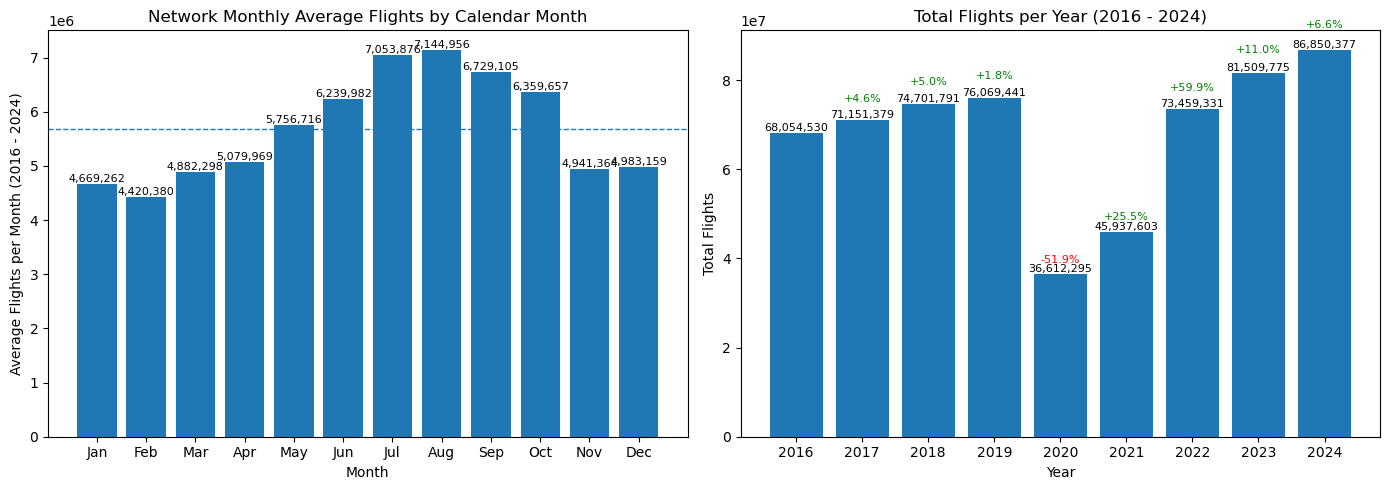

In [15]:
# --- 3.1 Extension: Monthly Avg (left) + Yearly Totals with % Change (right) ---

# Work on a copy of just the columns we need
__tmp_flights = df[['YEAR', 'MONTH_NUM', 'FLT_ERT_1']].copy()
__per_year_month = __tmp_flights.groupby(['YEAR', 'MONTH_NUM'], as_index=False)['FLT_ERT_1'].sum()

# Monthly average by calendar month
avg_monthly_flights_by_month = (
    __per_year_month
    .groupby('MONTH_NUM', as_index=False)['FLT_ERT_1']
    .mean()
    .rename(columns={'FLT_ERT_1':'AVG_FLIGHTS'})
    .sort_values('MONTH_NUM')
)
__month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
avg_monthly_flights_by_month['MONTH_LABEL'] = avg_monthly_flights_by_month['MONTH_NUM'].map(
    dict(zip(range(1,13), __month_labels))
)
overall_monthly_mean = avg_monthly_flights_by_month['AVG_FLIGHTS'].mean()

# Yearly totals and YoY % change
total_flights_per_year = (
    __per_year_month
    .groupby('YEAR', as_index=False)['FLT_ERT_1']
    .sum()
    .rename(columns={'FLT_ERT_1':'TOTAL_FLIGHTS'})
)





total_flights_per_year['PCT_CHANGE'] = total_flights_per_year['TOTAL_FLIGHTS'].pct_change() * 100

# --- Plot side-by-side ---
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Left: Monthly Average Flights
bars = axes[0].bar(
    avg_monthly_flights_by_month['MONTH_LABEL'],
    avg_monthly_flights_by_month['AVG_FLIGHTS']
)
axes[0].axhline(overall_monthly_mean, linestyle='--', linewidth=1)
axes[0].set_title('Network Monthly Average Flights by Calendar Month', fontsize=12)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Flights per Month (2016 - 2024)')
for b in bars:
    h = b.get_height()
    if not np.isnan(h):
        axes[0].text(b.get_x() + b.get_width()/2, h, f'{h:,.0f}', ha='center', va='bottom', fontsize=8)

# Right: Yearly Total Flights + % Change
bars2 = axes[1].bar(
    total_flights_per_year['YEAR'].astype(str),
    total_flights_per_year['TOTAL_FLIGHTS']
)
axes[1].set_title('Total Flights per Year (2016 - 2024)', fontsize=12)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Flights')
for i, b in enumerate(bars2):
    h = b.get_height()
    if not np.isnan(h):
        axes[1].text(b.get_x() + b.get_width()/2, h, f'{h:,.0f}', ha='center', va='bottom', fontsize=8)
        # Add YoY % change label
        if not np.isnan(total_flights_per_year['PCT_CHANGE'][i]):
            pct = total_flights_per_year['PCT_CHANGE'][i]
            color = 'green' if pct > 0 else 'red'
            axes[1].text(b.get_x() + b.get_width()/2, h + (h*0.05), f'{pct:+.1f}%', 
                         ha='center', va='bottom', fontsize=8, color=color)

plt.tight_layout()
plt.show()


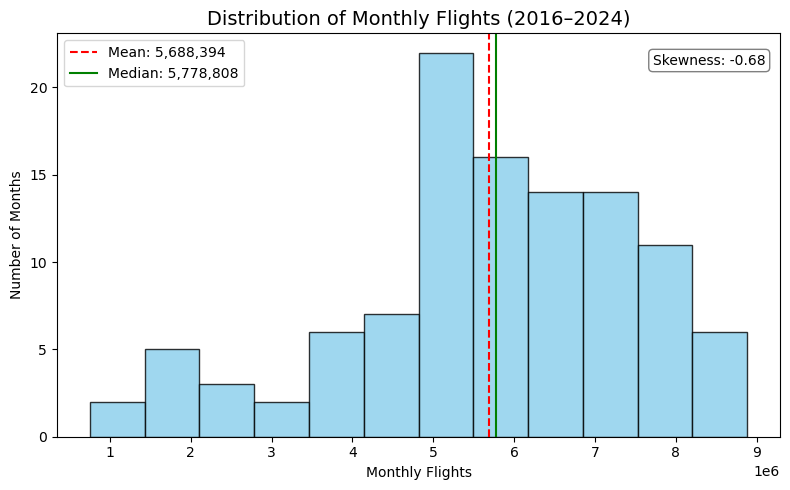

In [16]:
from scipy.stats import skew

# --- Histogram of Monthly Flights (Univariate: FLT_ERT_1) with Skewness ---

# 1) Monthly total flights
hist_monthly_flights = (
    df.groupby(['YEAR', 'MONTH_NUM'])['FLT_ERT_1']
      .sum()
      .reset_index()
)

# 2) Calculate stats
mean_val = hist_monthly_flights['FLT_ERT_1'].mean()
median_val = hist_monthly_flights['FLT_ERT_1'].median()
skew_val = skew(hist_monthly_flights['FLT_ERT_1'])

# 3) Plot histogram
plt.figure(figsize=(8,5))
plt.hist(
    hist_monthly_flights['FLT_ERT_1'],
    bins=12,
    color='skyblue',
    edgecolor='black',
    alpha=0.8
)

# Mean & median lines
plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:,.0f}')
plt.axvline(median_val, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_val:,.0f}')

# Skewness text annotation
plt.text(
    0.98, 0.95,
    f"Skewness: {skew_val:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    color='black',
    ha='right',
    va='top',
    bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.3')
)

# Labels & legend
plt.title('Distribution of Monthly Flights (2016–2024)', fontsize=14)
plt.xlabel('Monthly Flights')
plt.ylabel('Number of Months')
plt.legend()
plt.tight_layout()
plt.show()


### <font color='blue'> **Observation:**</font>

The month-by-month average flights chart (2016–2024) reveals a clear seasonal pattern in the EUROCONTROL network. 
* Traffic builds steadily from the winter low in February (≈4.42M flights) to a pronounced summer peak in July (≈7.05M) and August (≈7.14M), which are around **25% above the overall monthly average**. Flight volumes then decline sharply from September onwards, reaching a secondary low in November (≈4.94M) before a slight December recovery, likely due to holiday travel.
* On the side note, this peak period are due to a mix of summer weather, school holidays break, festival/cultural events and work leave patterns in Europe. 

The histogram of monthly flights complements this view by showing the **overall distribution** of monthly totals across all years. 
* Most months cluster between **5M and 7M flights**, with fewer months at the extremes. 
* The mean (≈5.69M) is slightly below the median (≈5.78M). 
* The skewness value of **–0.68** indicates a **moderate left skew**. This suggests occasional months with substantially lower flight counts—such as during the COVID-19 pandemic (2020-2021)—that pull the distribution’s tail to the left. 
* Together, these charts highlight both the **predictable seasonal peaks** and the **impact of exceptional low-traffic months** on the network’s overall traffic profile.


### <font color='blue'>3.2 Bivariate Analysis<a id=10></a></font>

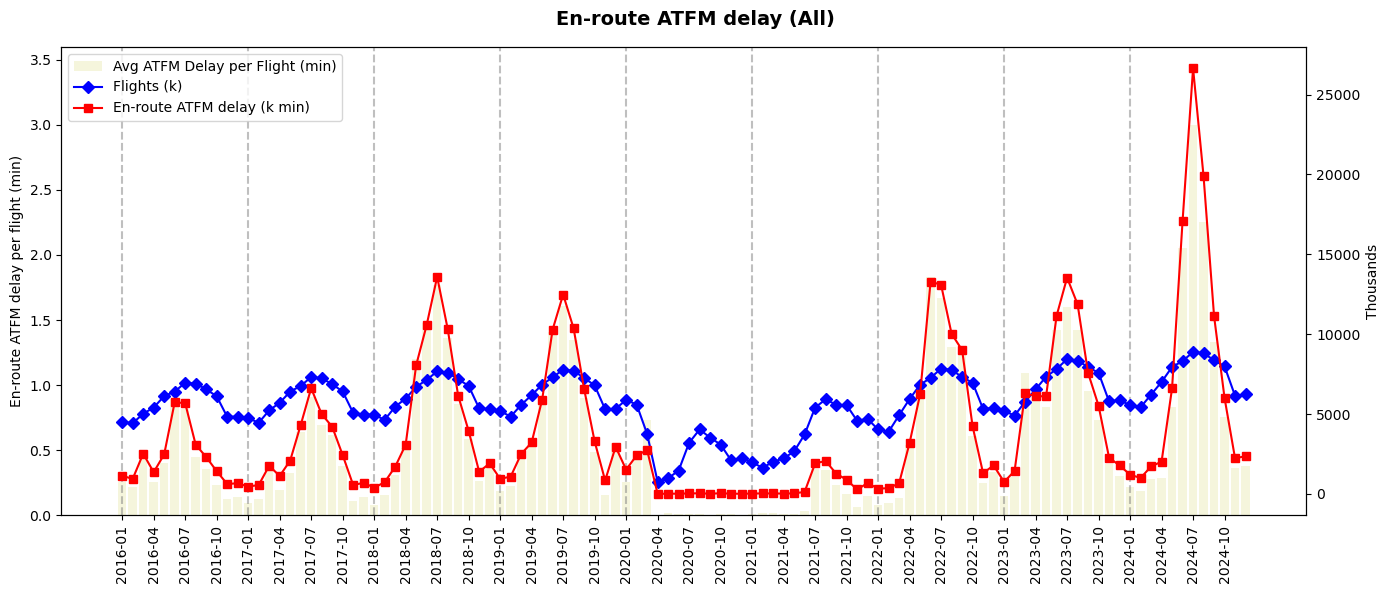

In [17]:


# Flights: ensure 1-D column named Total_Flights with YEAR/MONTH_NUM present
_flights = monthly_total_flights.copy()
if isinstance(_flights, pd.Series):
    _flights = _flights.rename('Total_Flights').reset_index()
elif {'YEAR','MONTH_NUM','FLT_ERT_1'}.issubset(_flights.columns):
    _flights = (
        _flights[['YEAR','MONTH_NUM','FLT_ERT_1']]
        .rename(columns={'FLT_ERT_1':'Total_Flights'})
    )
else:
    # If it's a grouped index without YEAR/MONTH_NUM columns, reset_index to expose them
    _flights = (
        _flights.reset_index()[['YEAR','MONTH_NUM','FLT_ERT_1']]
        .rename(columns={'FLT_ERT_1':'Total_Flights'})
    )

# 2) Delays: ensure 1-D column named Total_Delay with YEAR/MONTH_NUM present
_delays = monthly_total_delays_by_cause.copy()
if isinstance(_delays, pd.Series):
    _delays = _delays.rename('Total_Delay').reset_index()
elif {'YEAR','MONTH_NUM','DLY_ERT_1'}.issubset(_delays.columns):
    _delays = (
        _delays[['YEAR','MONTH_NUM','DLY_ERT_1']]
        .rename(columns={'DLY_ERT_1':'Total_Delay'})
    )
else:
    _delays = (
        _delays.reset_index()[['YEAR','MONTH_NUM','DLY_ERT_1']]
        .rename(columns={'DLY_ERT_1':'Total_Delay'})
    )

# 3) Merge to build monthly_data (sorted, clean index)
monthly_data = (
    _flights.merge(_delays, on=['YEAR','MONTH_NUM'], how='inner')
            .sort_values(['YEAR','MONTH_NUM'])
            .reset_index(drop=True)
)

# 4) Add your derived fields (safe divide, handle inf)
monthly_data['Month_Year'] = (
    monthly_data['YEAR'].astype(str) + '-' + monthly_data['MONTH_NUM'].astype(str).str.zfill(2)
)
monthly_data['Avg_Delay_per_Flight'] = (monthly_data['Total_Delay'] / monthly_data['Total_Flights']).replace([np.inf, -np.inf], np.nan)
monthly_data['Flights_k'] = monthly_data['Total_Flights'] / 1000.0
monthly_data['Delay_k'] = monthly_data['Total_Delay'] / 1000.0

# --- Plot (kept as close to your original as possible) ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bars for Avg Delay per Flight
ax1.bar(
    monthly_data['Month_Year'],
    monthly_data['Avg_Delay_per_Flight'],
    color='beige',
    label='Avg ATFM Delay per Flight (min)'
)
ax1.set_ylabel('En-route ATFM delay per flight (min)', color='black')
if monthly_data['Avg_Delay_per_Flight'].notna().any():
    ax1.set_ylim(0, monthly_data['Avg_Delay_per_Flight'].max() * 1.2)
ax1.tick_params(axis='y', labelcolor='black')

# Twin axis for Flights & Total Delay
ax2 = ax1.twinx()
ax2.plot(monthly_data['Month_Year'], monthly_data['Flights_k'], color='blue', marker='D', label='Flights (k)')
ax2.plot(monthly_data['Month_Year'], monthly_data['Delay_k'], color='red', marker='s', label='En-route ATFM delay (k min)')
ax2.set_ylabel('Thousands', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# X-axis formatting
ax1.set_xticks(range(0, len(monthly_data), 3))
ax1.set_xticklabels(monthly_data['Month_Year'][::3], rotation=90)

# Vertical separators for each January (first month in each year)
year_start_idx = monthly_data.groupby('YEAR').head(1).index
for idx in year_start_idx:
    ax1.axvline(idx, color='grey', linestyle='--', alpha=0.5)

# Title & Legend
fig.suptitle('En-route ATFM delay (All)', fontsize=14, fontweight='bold')
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()


### <font color='blue'> **Observation:**</font>

This time series chart compares average ATFM delay per flight, total flights, and total en-route ATFM delay from 2016 to 2024.

A seasonal pattern is clear — delay per flight peaks almost every summer (June–August), aligning with the busiest travel period in Europe.

Large spikes in total delay minutes often occur in high-traffic months, but not always in direct proportion to flight numbers, indicating that operational or external disruptions (e.g., weather, strikes) can sharply amplify delays.

Notable anomalies:

2018–2019 summers show sustained high delay per flight despite relatively stable flight counts.

2020–2021 display exceptionally low delays due to Covid pandemic-related traffic reductions.

July 2024 marks the highest total delay spike in the dataset, suggesting an extraordinary operational disruption.


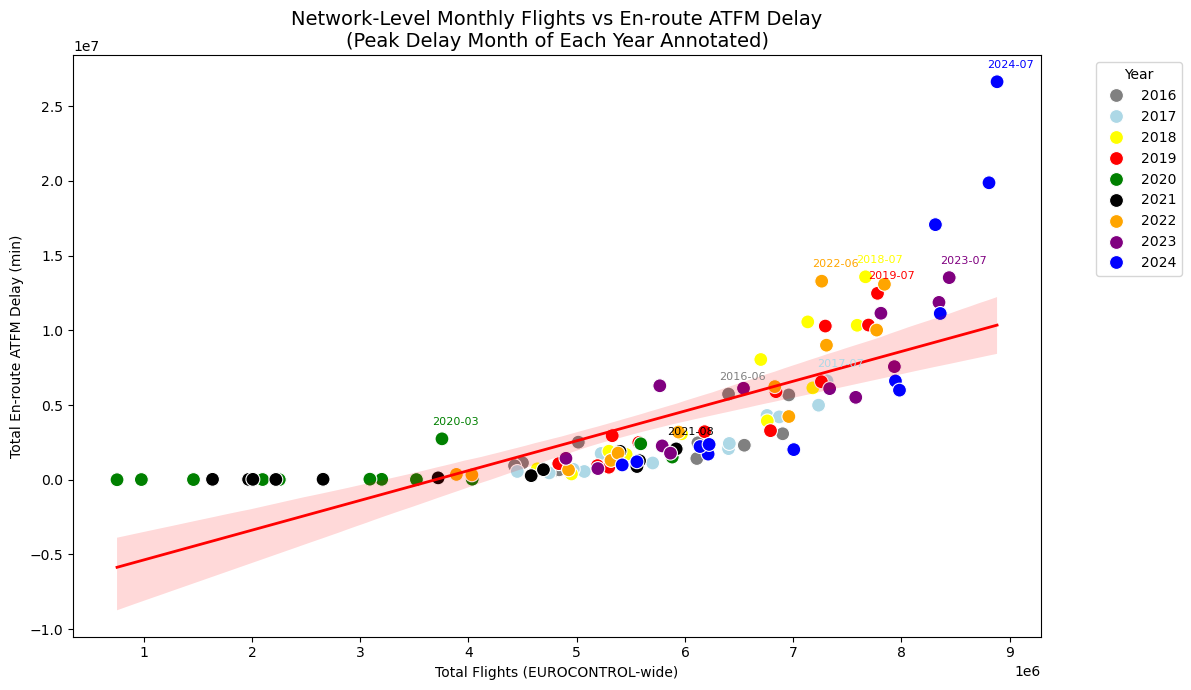

In [18]:
# Aggregate data at monthly network level
network_monthly = df.groupby(['YEAR', 'MONTH_NUM'])[['FLT_ERT_1', 'DLY_ERT_1']].sum().reset_index()

# Add Month-Year column for reference (optional)
network_monthly['Month_Year'] = network_monthly['YEAR'].astype(str) + '-' + network_monthly['MONTH_NUM'].astype(str).str.zfill(2)


# Custom color palette
year_palette = {
    2016: 'grey',
    2017: 'lightblue',
    2018: 'yellow',
    2019: 'red',       
    2020: 'green',
    2021: 'black',
    2022: 'orange',
    2023: 'purple',
    2024: 'blue'
}

plt.figure(figsize=(12, 7))

# Scatterplot
sns.scatterplot(
    data=network_monthly,
    x='FLT_ERT_1',
    y='DLY_ERT_1',
    hue='YEAR',
    palette=year_palette,
    s=100
)

# Regression line
sns.regplot(
    data=network_monthly,
    x='FLT_ERT_1',
    y='DLY_ERT_1',
    scatter=False,
    color='red',
    line_kws={'linewidth': 2}
)

# Annotate peak delay month for each year
peak_months = network_monthly.loc[network_monthly.groupby('YEAR')['DLY_ERT_1'].idxmax()]

for _, row in peak_months.iterrows():
    plt.annotate(
        f"{row['YEAR']}-{row['MONTH_NUM']:02d}", 
        (row['FLT_ERT_1'], row['DLY_ERT_1']),
        textcoords="offset points", 
        xytext=(10, 10), 
        ha='center', 
        fontsize=8, 
        color=year_palette[row['YEAR']]
    )

# Labels & Title
plt.title('Network-Level Monthly Flights vs En-route ATFM Delay\n(Peak Delay Month of Each Year Annotated)', fontsize=14)
plt.xlabel('Total Flights (EUROCONTROL-wide)')
plt.ylabel('Total En-route ATFM Delay (min)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### <font color='blue'> **Observation:**</font>

This scatter plot examines the relationship between total flights and total en-route ATFM delay.

* A positive correlation is evident — higher traffic volumes generally correspond to higher total delays.

* Peak delay months (annotated per year) cluster toward the higher-flight end, particularly in summer seasons.

* However, there is considerable variation — for example, some high-flight months have moderate delays, suggesting that efficient capacity management or favorable weather mitigated disruption.

* Outliers like July 2024 sit far above the regression line, reflecting abnormal delay intensity relative to flights handled.

News Coverage
* The Times reported that summer 2024 delays were 47% worse than in 2023, with capacity constraints and staffing shortages being major contributing factors. Airlines highlighted infrastructure limits and complex training requirements for air traffic controllers as significant bottlenecks.


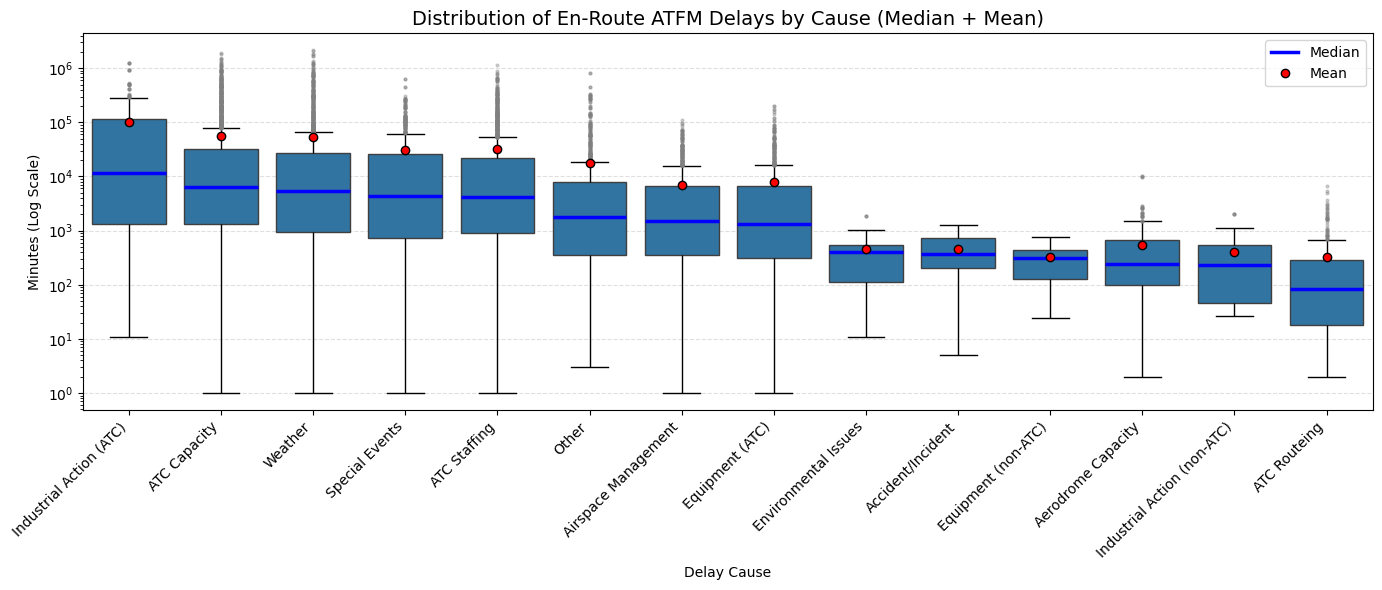

In [19]:
from matplotlib.lines import Line2D

# --- 1) Define cause columns + pretty labels ---
cause_labels = {
    'DLY_ERT_A_1': 'Accident/Incident',
    'DLY_ERT_C_1': 'ATC Capacity',
    'DLY_ERT_E_1': 'Equipment (non-ATC)',
    'DLY_ERT_G_1': 'Aerodrome Capacity',
    'DLY_ERT_I_1': 'Industrial Action (ATC)',
    'DLY_ERT_M_1': 'Airspace Management',
    'DLY_ERT_N_1': 'Industrial Action (non-ATC)',
    'DLY_ERT_O_1': 'Other',
    'DLY_ERT_P_1': 'Special Events',
    'DLY_ERT_R_1': 'ATC Routeing',
    'DLY_ERT_S_1': 'ATC Staffing',
    'DLY_ERT_T_1': 'Equipment (ATC)',
    'DLY_ERT_V_1': 'Environmental Issues',
    'DLY_ERT_W_1': 'Weather'
}
cause_cols = list(cause_labels.keys())

# --- 2) Melt to long format and map readable names ---
delay_data_melted = df.melt(
    value_vars=cause_cols,
    var_name='Delay_Cause',
    value_name='Minutes'
)
delay_data_melted['Delay_Cause'] = delay_data_melted['Delay_Cause'].map(cause_labels)

# Optional: drop non-positive values so log scale works
delay_data_melted = delay_data_melted[delay_data_melted['Minutes'] > 0]

# --- 3) Order causes by median delay (descending) for nicer plotting ---
median_order = (
    delay_data_melted
    .groupby('Delay_Cause')['Minutes']
    .median()
    .sort_values(ascending=False)
    .index
)

# --- 4) Plot ---
plt.figure(figsize=(14, 6))
ax = sns.boxplot(
    data=delay_data_melted,
    x='Delay_Cause',
    y='Minutes',
    order=median_order,
    showmeans=True,
    meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=6),
    medianprops=dict(color='blue', linewidth=2.5),
    whiskerprops=dict(color='black', linewidth=1),
    capprops=dict(color='black', linewidth=1),
    flierprops=dict(marker='o', markersize=2, alpha=0.35, markeredgecolor='gray', markerfacecolor='gray')
)

ax.set_yscale('log')
ax.set_title('Distribution of En-Route ATFM Delays by Cause (Median + Mean)', fontsize=14)
ax.set_xlabel('Delay Cause')
ax.set_ylabel('Minutes (Log Scale)')
plt.xticks(rotation=45, ha='right')

# Clean legend with only markers (Median line + Mean dot)
legend_handles = [
    Line2D([0], [0], color='blue', linewidth=2.5, label='Median'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markeredgecolor='black', label='Mean')
]
ax.legend(handles=legend_handles, loc='upper right')

# Horizontal dashed grid helps reading the log axis
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


### <font color='blue'> **Observation:**</font>

This boxplot shows the distribution of monthly en-route ATFM delay minutes for each delay cause, plotted on a logarithmic scale to accommodate the wide range of values.

Median (blue line) → Represents the central monthly delay level for each cause.

Mean (red dot) → In many cases sits well above the median, indicating positively skewed distributions — most months have relatively low delays, but occasional extreme events drive the average upward.

**Key observations:**

1. Highest central tendency:

* Industrial Action (ATC) has the highest median monthly delay (~11,600 minutes), with a mean over an order of magnitude higher, reflecting rare but severe disruption events.

* ATC Capacity and Weather follow, each with medians in the thousands of minutes, and large spreads.

2. Extreme variability:

* Categories like Weather, Special Events, and Industrial Action (ATC) have long upper whiskers and many outliers, showing that while delays are often moderate, they can spike dramatically in certain months.

3. Lower-impact categories:

* Causes such as ATC Routing, Industrial Action (non-ATC), and Aerodrome Capacity have both low medians and relatively smaller spreads, indicating they contribute less frequently and less severely to network-wide delays.

4. Skewness impact:

* The consistent gap between red dots (means) and blue lines (medians) for major causes demonstrates the influence of high-impact but infrequent events (e.g., severe storms, major ATC Industrial Action) on overall averages. This pattern means that while most months have relatively low delay minutes, there are a few months with extremely high delays that pull the mean upward — a classic sign of right skew


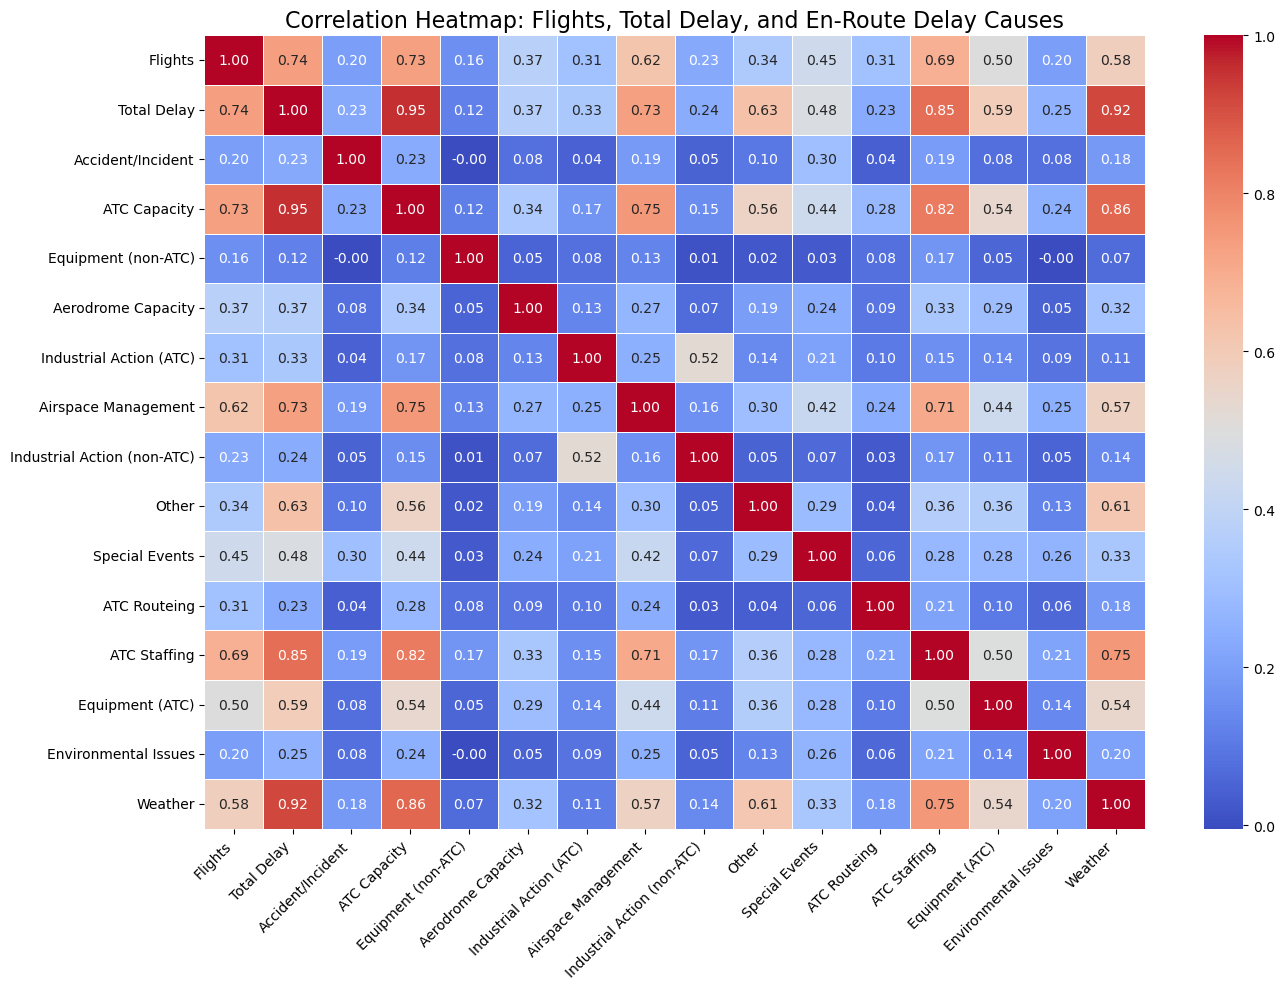

In [20]:

# Add total columns to analyze correlation
columns_to_include = ['FLT_ERT_1', 'DLY_ERT_1'] + list(cause_labels.keys())

# Filter and compute correlation
corr_df = df[columns_to_include].corr()

# Rename columns for readability
pretty_labels = {
    'FLT_ERT_1': 'Flights',
    'DLY_ERT_1': 'Total Delay'
}
pretty_labels.update(cause_labels)

corr_df.rename(columns=pretty_labels, index=pretty_labels, inplace=True)

# Plot
plt.figure(figsize=(14, 10))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Flights, Total Delay, and En-Route Delay Causes", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### <font color='blue'> **Observation:**</font>

The heatmap quantifies relationships between Flights, Total Delay, and each delay cause.

* Flights correlates strongly with Total Delay (0.74) and ATC Capacity delays (0.73), reflecting demand-driven capacity strain.

* Weather delays show the strongest link with Total Delay (0.92), underscoring their disruptive impact even when not directly tied to traffic volume.

* Causes like Industrial Action (non-ATC) have low correlation with flights but moderate correlation with Total Delay, suggesting they occur independently of demand levels.

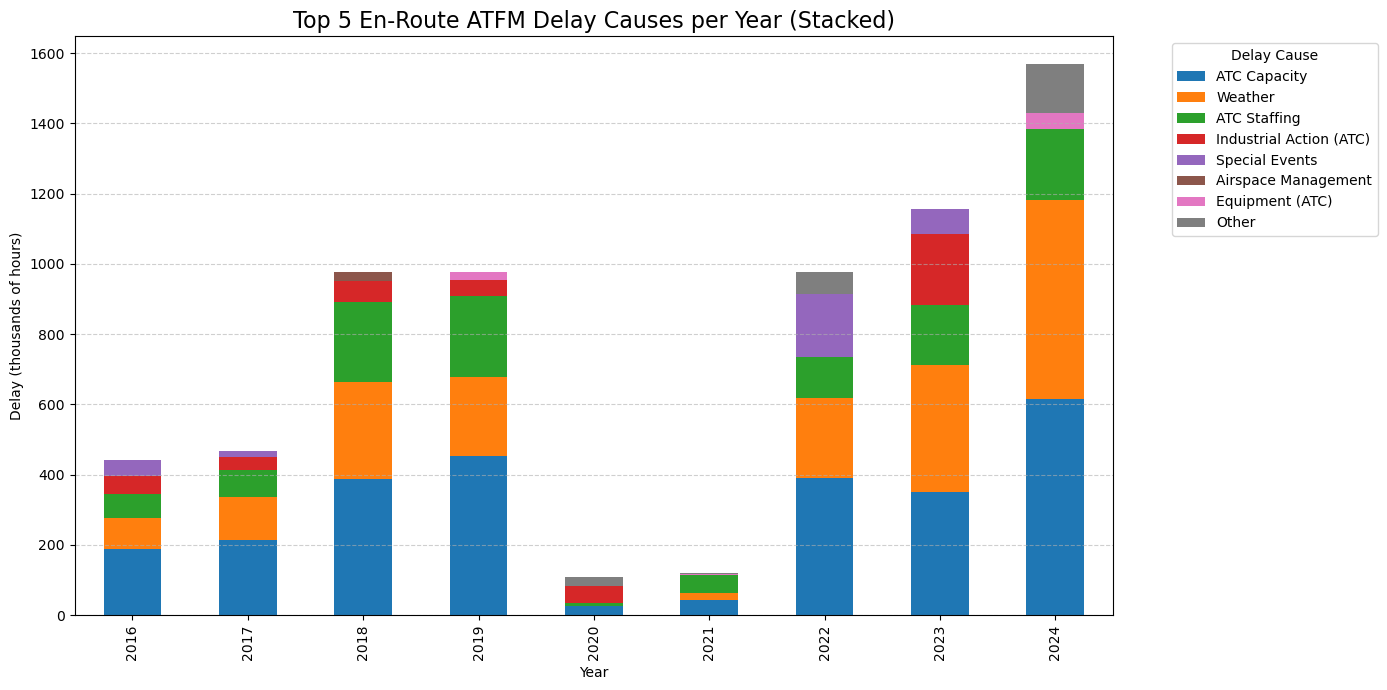

In [21]:

# --- Cause columns ---
cause_cols = list(cause_labels.keys())

# --- Aggregate yearly delay by cause ---
yearly_causes = df.groupby('YEAR')[cause_cols].sum().reset_index()

# --- Map cause codes to descriptive names ---
yearly_causes.rename(columns=cause_labels, inplace=True)

# --- Convert minutes to thousands of hours ---
yearly_causes.iloc[:, 1:] = yearly_causes.iloc[:, 1:] / 60_000

# --- For each year, select top 5 causes only ---
stacked_data = []
for year in yearly_causes['YEAR']:
    year_data = yearly_causes[yearly_causes['YEAR'] == year].copy()
    year_data = year_data.set_index('YEAR')
    top5_cols = year_data.T.nlargest(5, year).index
    stacked_data.append(year_data[top5_cols])

# --- Combine top 5 causes from all years ---
stacked_df = pd.concat(stacked_data)
stacked_df = stacked_df.fillna(0)

# --- Plot stacked bar chart ---
ax = stacked_df.plot(kind='bar', stacked=True, figsize=(14, 7))

# Title & labels
plt.title("Top 5 En-Route ATFM Delay Causes per Year (Stacked)", fontsize=16)
plt.ylabel("Delay (thousands of hours)")
plt.xlabel("Year")

# Horizontal dashed grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Legend outside
plt.legend(title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### <font color='blue'> **Observation:**</font>

This chart tracks the yearly composition of the top five delay causes.

* ATC Capacity and Weather dominate most years, with their combined share exceeding 50% of annual delay hours.

* The 2018–2019 and 2023–2024 peaks reflect years when both causes were simultaneously high, compounding total delays.

* ATC Staffing emerges as a persistent contributor, especially in 2018–2019.

* Industrial Action (ATC) and occasional Special Events appear sporadically but can significantly impact specific years (e.g., 2022 and 2023).

* 2020 shows a drastic drop across all causes due to COVID-19 restrictions, with 2021 still suppressed before a sharp rebound in 2022–2024.

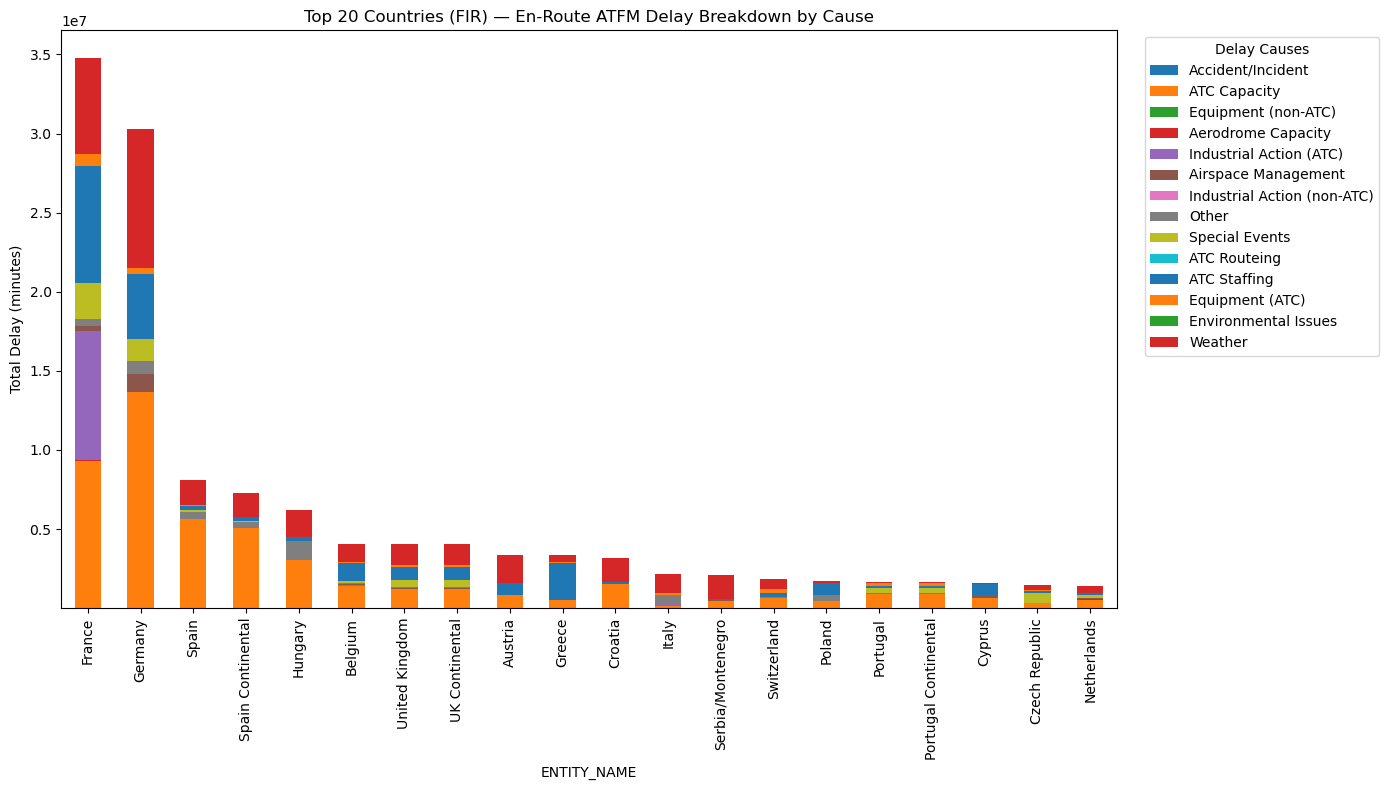

In [22]:

# --- Filter to ENTITY_TYPE: COUNTRY (FIR) ---
df_country_fir = df[df["ENTITY_TYPE"] == "COUNTRY (FIR)"].copy()

# Keep only causes that actually exist in the dataframe
cause_cols = [c for c in cause_labels if c in df_country_fir.columns]

# --- Compute total delay across chosen causes ---
df_country_fir["TOTAL_DELAY"] = df_country_fir[cause_cols].sum(axis=1)

# --- Top 20 ENTITY_NAME by total delay ---
top_20_entities = (
    df_country_fir.groupby("ENTITY_NAME")["TOTAL_DELAY"]
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .index
)

# --- Aggregate for plotting ---
top_df = df_country_fir[df_country_fir["ENTITY_NAME"].isin(top_20_entities)].copy()
agg = top_df.groupby("ENTITY_NAME")[cause_cols].sum()

# Order entities by total delay (desc) for readability
agg = agg.loc[agg.sum(axis=1).sort_values(ascending=False).index]

# Use pretty labels for legend
agg = agg.rename(columns=cause_labels)

# --- Plot ---
fig, ax = plt.subplots(figsize=(14, 8))
agg.plot(kind="bar", stacked=True, ax=ax)  # matplotlib, no explicit colors

ax.set_xlabel("ENTITY_NAME")
ax.set_ylabel("Total Delay (minutes)")
ax.set_title("Top 20 Countries (FIR) — En-Route ATFM Delay Breakdown by Cause")
ax.legend(title="Delay Causes", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


### <font color='blue'> **Observation:**</font>

1. Dominance of a few Entities

* France and Germany clearly stand out, together contributing the largest share of total en-route ATFM delays.

* Spain (both “Spain” and “Spain Continental”) also features prominently, indicating that high delays are concentrated in a small number of FIRs.

2. Main delay causes

* ATC Capacity is the single largest contributor for most high-delay FIRs, particularly in France, Germany, and Spain.

* Weather is a significant secondary contributor for several countries, especially France and Germany.

* Industrial Action (ATC) appears as a large segment in France, showing the impact of strikes on delays.

3. Regional patterns

* Central and Western European FIRs (France, Germany, Spain, Belgium, UK) dominate the top rankings.

* Eastern and Southern European FIRs (Hungary, Greece, Croatia) have smaller totals but still show a similar cause mix, mostly ATC Capacity and Weather.

4. Cause diversity

* Some FIRs (e.g., France, Germany) have a broad mix of causes, while others (e.g., Cyprus, Czech Republic) have delays dominated by just one or two causes.

5. Operational insight

* Mitigation efforts targeted at ATC Capacity improvements and strike management could yield the greatest reduction in total delays for the largest FIRs.

### <font color='blue'>3.3 EDA Conclusion<a id=11></a></font>


* **Data scope & quality:** The working table contains 6,084 FIR-month rows (2016–2024) across 24 columns. Missing value is concentrated in the delay-by-cause fields; these were correctly treated as 0 = no delay. Non-informative column `ATFM_VERSION` was removed; `DLY_ERT_NA_1` is all zeros and was dropped.
* **Level of aggregation:** Each record is a **FIR × month** observation. This grain is consistent across years and suitable for trend, seasonality, and attribution analyses.
* **Core distributions:** Total flights (`FLT_ERT_1`) show a wide range (very large FIRs vs small FIRs). Delay variables are zero-inflated and right-skewed (many months with low/no delay and a long right tail during peaks/events).
* **Trends (2016–2024):** Clear growth 2016–2019, a structural collapse in 2020–2021 (COVID shock), followed by a rebound from 2022 towards pre-COVID levels. Trend breaks justify handling COVID years carefully in modeling/evaluation.
* **Seasonality:** Strong summer peak (Jun–Aug, often July) and winter trough (Jan–Feb) in both flights and total delay. Peak months vary by entity/year but the summer pattern is persistent.
* **Flights vs delay (exposure effect):** A positive relationship exists between flights and delay at network level; variance increases at higher traffic. “Delay per flight” spikes in some months indicate non-volume drivers (capacity constraints, weather, industrial action).
* **Preliminary cause picture (descriptive):** ATC Capacity (C) is the dominant cause at network level; Weather delay rises in summer; Industrial action (I/N) appears as sporadic spikes; Other (O) is small.
* **Entity differences:** Large/complex airspaces (e.g., big States/Functional Air Blocks) contribute a disproportionate share of network delay and show stronger seasonality. Smaller FIRs have frequent zero-delay months.
* **Data decisions validated:** Keeping `MONTH_NUM` (numeric) is helpful for modeling; `MONTH_MON` can be kept for labeling only. Filling cause NaNs with 0 matches the semantics of “no delay recorded”.
* **Implications for modeling:**

  * Use **non-leaky features** for forecasting `DLY_ERT_1`: `FLT_ERT_1`, `MONTH_NUM`, `YEAR`, and entity identifiers; exclude same-month cause columns from the predictive model.
  * Prefer tree ensembles (Random Forest) to capture non-linearities and interactions (seasonality × entity × volume).
  * Considered time-aware validation (e.g., train ≤2019 & 2022–2023, test on 2024) and/or walk-forward splits due to trend/seasonality/COVID break.
* **Risks & caveats:** Sudden shocks (industrial action, extreme weather) can cause out-of-pattern spikes that pure volume/seasonality features won’t capture; treat them as exogenous or add event flags when known.

**Bottom line:** The data shows a clear exposure-driven foundation (more flights → more delay), strong seasonality, and heterogeneity by entity, overlaid with episodic events. With leakage avoided, ensemble models are well-suited and should be evaluated with time-aware splits.


<h3 style="color:blue; font-size:26px;">4. Data Preprocessing<a id="12"></a></h3>

### <font color='blue'>4.1 Data Preparation<a id=13></a></font>

Prediction of Total Delay is using Flights and Time Features.

** The data for 2020 and 2021 (Covid Years) will be excluded as they do not represent "normal" operations. 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:

# --- Filter dataset (exclude COVID years) ---
df_filtered = df[~df['YEAR'].isin([2020, 2021])].copy()

# --- Features available before delay happens ---
features = ['FLT_ERT_1', 'MONTH_NUM', 'YEAR']
target = 'DLY_ERT_1'

# --- Split data ---
X = df_filtered[features]
y = df_filtered[target]


### <font color='blue'>4.2 Train-Test Split<a id=14></a></font>

In [25]:

# Train-test split (exclude COVID years already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Length of Training Set:', len(X_train))
print('Length of Testing Set:', len(X_test))

Length of Training Set: 3772
Length of Testing Set: 944


<h3 style="color:blue; font-size:26px;">5. Modeling<a id="15"></a></h3>

### <font color='blue'>5.1 Linear Regression Model<a id=16></a></font>

In [26]:
# Train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Linear Regression Performance (No Leakage):")
print(f"R²: {r2_score(y_test, y_pred_lr):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f} minutes")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f} minutes")


Linear Regression Performance (No Leakage):
R²: 0.564
MAE: 108223.41 minutes
RMSE: 186802.27 minutes


### <font color='blue'>5.2 Random Forest Model<a id=17></a></font>

In [27]:
# Train
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Performance (No Leakage):")
print(f"R²: {r2_score(y_test, y_pred_rf):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f} minutes")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f} minutes")


Random Forest Performance (No Leakage):
R²: 0.838
MAE: 40673.19 minutes
RMSE: 113851.88 minutes


### <font color='blue'>5.3 Decision Tree Model<a id=18></a></font>

In [28]:
from sklearn.tree import DecisionTreeRegressor

# --- Decision Tree model ---
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# --- Predictions ---
y_pred_dt = dt_model.predict(X_test)

# --- Evaluation ---
print("Decision Tree Regressor Performance (No Leakage):")
print(f"R²: {r2_score(y_test, y_pred_dt):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt):.2f} minutes")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt)):.2f} minutes")


Decision Tree Regressor Performance (No Leakage):
R²: 0.692
MAE: 49460.67 minutes
RMSE: 156896.33 minutes



### <font color='blue'>5.4 Model Performance Overview (2020-2021 excluded)<a id=19></a></font>

| Model                 | R²    | MAE (minutes) | RMSE (minutes) |
| --------------------- | ----- | ------------- | -------------- |
| **Linear Regression** | 0.564 | 108,223       | 186,802        |
| **Decision Tree**     | 0.692 | 49,461        | 156,896        |
| **Random Forest**     | 0.838 | 40,673        | 113,852        |

---

### <font color='blue'> **Observation:**</font>

### **R² (coefficient of determination)**

How much variance in the target your model explains (higher is better)

* **Random Forest** explains the most variance (84%)
* **Decision Tree** captures more than Linear Regression but less than Random Forest (69%)
* **Linear Regression** explains the least variance (56%) 

---

### **MAE (Average Absolute Error)**

Average absolute difference between predictions and actuals. Same units as the target (lower is better)

* **Random Forest** lowest error (\~40k min)
* **Decision Tree** moderate error (\~49k min)
* **Linear Regression** highest error (\~108k min)

---

### **RMSE (root mean squared error)**

RMSE is similar to MAE but penalizes big errors more (lower is better)

* **Random Forest** again best (\~114k min)
* **Decision Tree** better than Linear Regression but worse than RF (\~157k min)
* **Linear Regression** worst (\~187k min)

-------------------------------------------

Random Forest: Best performing model (R²=0.838) → explains 84% of variance

Decision Tree: Middle performance (R²=0.692) → less stable but interpretable

Linear Regression: Baseline (R²=0.564) → weakest, can be use as a benchmark

-------------------------------------------
Primary metric is R² as stakeholders want to know how well the model explains variance in total delays

R² is complemented by MAE/RMSE for practical interpretation in minutes/hours


C:\Users\jimmm\AppData\Local\Temp\ipykernel_3464\3850534157.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette="Blues_r")


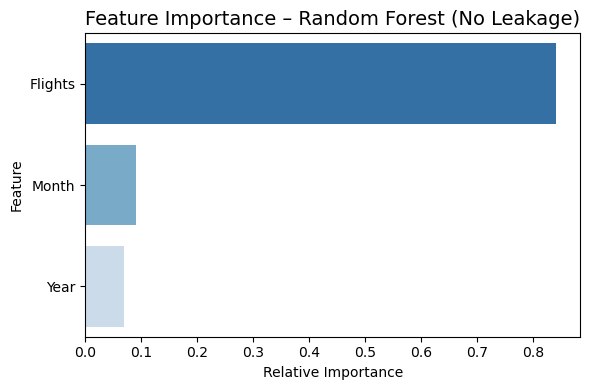

In [29]:


# Extract importances from your fitted model (rf_model) and feature matrix (X)
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# --- y-axis mapping ---
friendly_names = {
    'FLT_ERT_1': 'Flights',
    'MONTH_NUM': 'Month',
    'YEAR': 'Year'
}

# Replace column names (keep original if not in dict)
feat_imp_df['Feature'] = feat_imp_df['Feature'].map(lambda x: friendly_names.get(x, x))

# --- Plot ---
plt.figure(figsize=(6, 4))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette="Blues_r")
plt.title("Feature Importance – Random Forest (No Leakage)", fontsize=14)
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### <font color='blue'> **Observation:**</font>

Higher importance = stronger influence on predicted delays.

Traffic volume (Flights) is a primary driver of delays.

'MONTH' show strong seasonal effects (especially in the summer peaks of July and August).

'YEAR' capture gradual trend shifts (growth in traffic, capacity changes).

C:\Users\jimmm\AppData\Local\Temp\ipykernel_3464\1730704343.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_cause_df, x='Importance', y='Cause', palette="Blues_r")


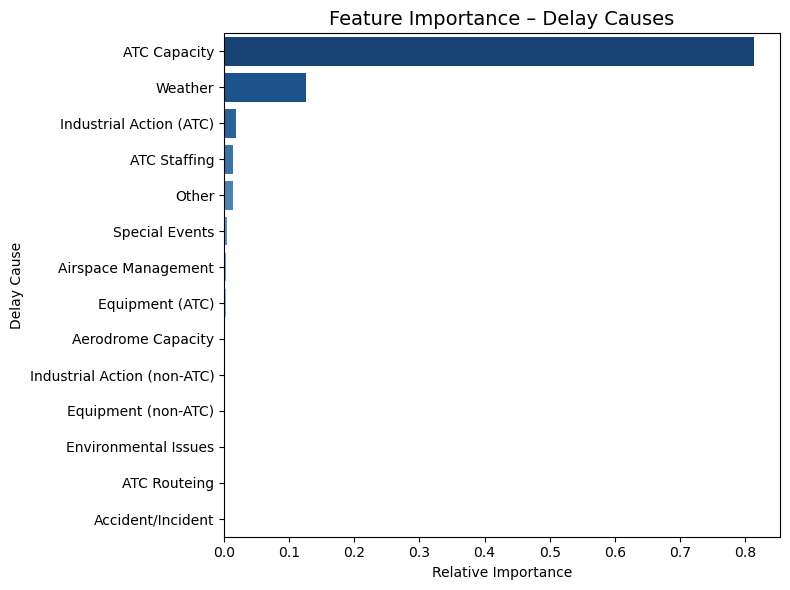

In [30]:
# --- Flter dataset (exclude COVID years) ---
df_causes = df[~df['YEAR'].isin([2020, 2021])].copy()

# --- Cause columns ---
cause_cols = list(cause_labels.keys())
target = 'DLY_ERT_1'

X_causes = df_causes[cause_cols]
y_causes = df_causes[target]

# --- Train-test split ---
from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_causes, y_causes, test_size=0.2, random_state=42)

# --- Random Forest model ---
rf_cause_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_cause_model.fit(X_train_c, y_train_c)

# --- Feature importance ---
importances_cause = rf_cause_model.feature_importances_

feat_imp_cause_df = pd.DataFrame({
    'Cause_Code': cause_cols,
    'Importance': importances_cause
})
feat_imp_cause_df['Cause'] = feat_imp_cause_df['Cause_Code'].map(cause_labels)
feat_imp_cause_df = feat_imp_cause_df.sort_values(by='Importance', ascending=False)

# --- Plot ---
plt.figure(figsize=(8, 6))
sns.barplot(data=feat_imp_cause_df, x='Importance', y='Cause', palette="Blues_r")
plt.title("Feature Importance – Delay Causes", fontsize=14)
plt.xlabel("Relative Importance")
plt.ylabel("Delay Causes")
plt.tight_layout()
plt.show()


### <font color='blue'> **Observation:**</font>

* ATC Capacity overwhelmingly dominates as the primary factor influencing delays 
* Weather being the only other cause with notable influence. 
* All other causes — including Industrial Action (ATC), ATC Staffing, and Other — contribute only marginally, while the remaining categories have negligible impact in the model.


### <font color='blue'>6. Overall Conclusion and Insights<a id=20></a></font>

**Dominant Delay Cause**

* Across the dataset, ATC Capacity is the single largest contributor to en-route delays by a significant margin, with Weather as the next major factor.

* Other causes like Industrial Action (ATC), ATC Staffing, and Airspace Management are secondary but can trigger sharp spikes during specific periods.

**Geographic Concentration**

* A handful of FIRs — notably France, Germany, Spain—account for the majority of total delays. This concentration means targeted interventions in these FIRs could yield disproportionate benefits.

**Seasonality & Peaks**

* Delays exhibit strong summer seasonality, aligning with peak travel demand and adverse weather frequency (storms, heatwaves).

* Strikes in certain years amplify delays, especially in France and Spain. The industry action are often targeted during the summer peak to maximise its impact. 

**Capacity vs. Demand Imbalance**

* Even as traffic recovered post-COVID, ATC capacity (staffing, sector throughput) has lagged behind, increasing the strain on the system in high-traffic months.

* The Russian-Ukraine war and conflict in Middle East have led to a reduction of available airspace for use due to changes in traffic flows. Certain regions are facing increasing traffic demand due to the shifts.

### <font color='blue'> **Potential Solutions**</font>

**Eurocontrol**

* Deploy delay mitigation strategies on ATC capacity such as expanding of Free Route Airspace (FRA) initiative to more members states. FRA helps with ATC capacity by smoothing traffic distribution, reducing controller workload. 

* Increased support for Flexible Use of Airspace (FUA) concept between civil and military flight operation to allow more efficient sharing of airspace resources. 

* Use of automation and AI that support decision making, reducing workload on Air Traffic Controller. 

* Human Resource initiative to retained ATC personnel, acceletrate recruitment and training in high-delayed FIRs.

* Study and invest on weather impact prediction tools to pro-actively re-route traffic flows. 

**Airlines**

* Deep dive analysis into existing route structure on city-pair to mitigate delays. Avoiding airspace or sectors accordingly during planning.

* Increase flight operation staff competetncy to file alternative flight plans in advance to switch quickly if sectors become congested. 

* Increase buffer time in block schedules during peak months to absorb delays. 


### <font color='Black'> **The End**</font>